**Titanic Dataset Analysis**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Data with Missing Values**

In [22]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [25]:
df[df['SibSp'].isnull()].count()[0]

0

In [26]:
df[df['Parch'].isnull()].count()[0]

0

In [27]:
df['fMembers'] = df['SibSp'] + df['Parch']

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**Total Survival Rate**

In [29]:
## Only 38% of total people onboard survived
(df.Survived.sum()/df.Survived.count())*100

38.38383838383838

**Mean Age grouped by Class**

In [30]:
mean_age = list(df.groupby('Pclass')['Age'].mean())
mean_age

[38.233440860215055, 29.87763005780347, 25.14061971830986]

**Age grouped by class -- Median**

In [31]:
mean_age1 = list(df.groupby('Pclass')['Age'].median())
mean_age1

[37.0, 29.0, 24.0]

**Fill Missing Values -- with mean age (Passenger Class)**

In [32]:
mask = [df['Pclass'] == 1, df['Pclass']== 2, df['Pclass']== 3]

In [33]:
for i in range(3):
    df.loc[df['Age'].isnull() & mask[i],'Age'] = round(mean_age[i])

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**Survival Rate according to Passenger Class**

In [35]:
## % survival in different passenger classes
print('Passenger Class 1')
print((df.Survived[mask[0]].sum()/df.Survived[mask[0]].count())*100)
print()
print('Passenger Class 2')
print((df.Survived[mask[1]].sum()/df.Survived[mask[1]].count())*100)
print()
print('Passenger Class 3')
print((df.Survived[mask[2]].sum()/df.Survived[mask[2]].count())*100)

Passenger Class 1
62.96296296296296

Passenger Class 2
47.28260869565217

Passenger Class 3
24.236252545824847


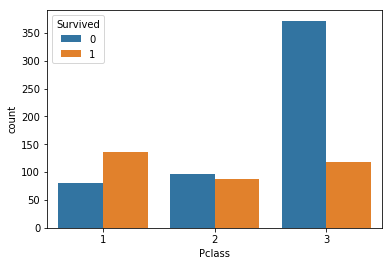

In [36]:
sns.countplot('Pclass',data=df,hue = 'Survived')

**Survival Rate according to Embarking Ports**

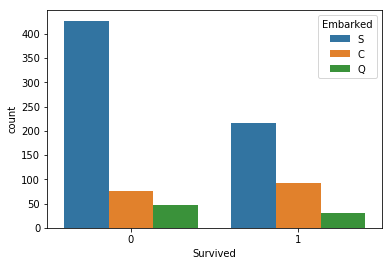

In [37]:
sns.countplot('Survived',data=df,hue='Embarked')

In [38]:
## Mask for embarked city
m1 = [df['Embarked'] == 'C', df['Embarked'] == 'Q', df['Embarked'] == 'S']

## % survival of people embarked from Cherbourg, Queenstown and Southampton
print('Cherbourg')
print((df.Survived[m1[0]].sum()/df.Survived[m1[0]].count())*100)
print()
print('Queenstown')
print((df.Survived[m1[1]].sum()/df.Survived[m1[1]].count())*100)
print()
print('Southampton')
print((df.Survived[m1[2]].sum()/df.Survived[m1[2]].count())*100)

Cherbourg
55.35714285714286

Queenstown
38.961038961038966

Southampton
33.69565217391305


**Total Family members and preference of Passenger classes**

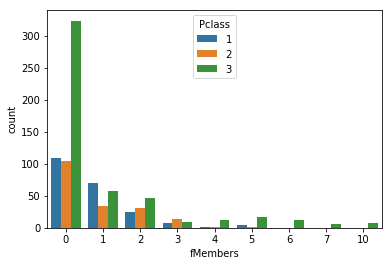

In [39]:
sns.countplot('fMembers',data=df,hue='Pclass')

**Fare Distribution -- Embarking Ports and Sex**

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


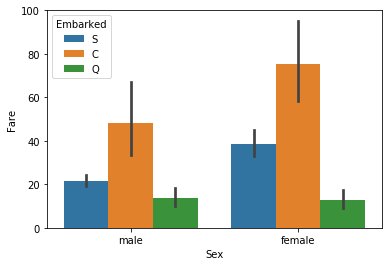

In [40]:
sns.barplot('Sex','Fare',data=df,hue = 'Embarked')

**Distribution of Fare**

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


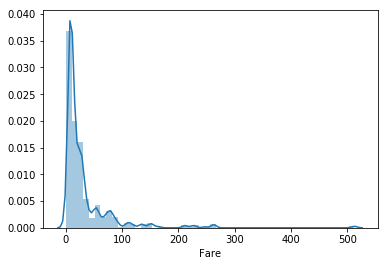

In [41]:
sns.distplot(df['Fare'])

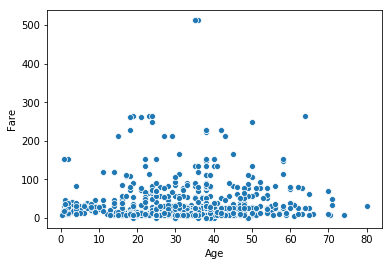

In [42]:
sns.scatterplot(df['Age'],df['Fare'])

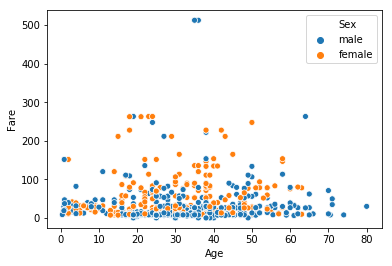

In [43]:
sns.scatterplot(df['Age'],df['Fare'],hue=df['Sex'])

**Fare Distribution among Survived Persons**

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


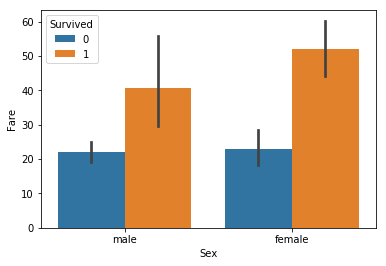

In [44]:
sns.barplot(x='Sex',y='Fare',data=df,hue='Survived')

**Choice Of passenger class**

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


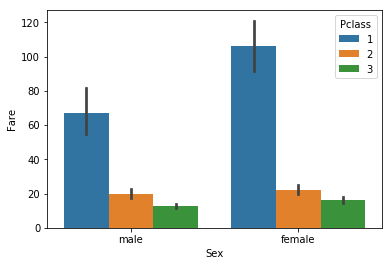

In [45]:
sns.barplot(x='Sex',y='Fare',data=df,hue='Pclass')

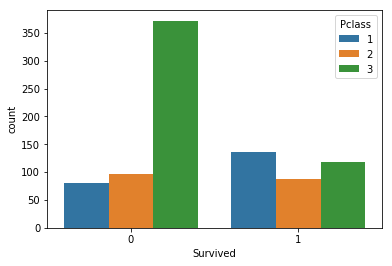

In [46]:
sns.countplot(x='Survived',data=df,hue='Pclass')

**Choice of Passenger class according to Sex**

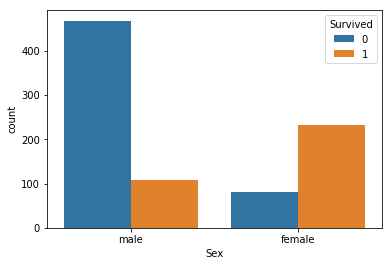

In [47]:
sns.countplot(x='Sex',data=df,hue='Survived')

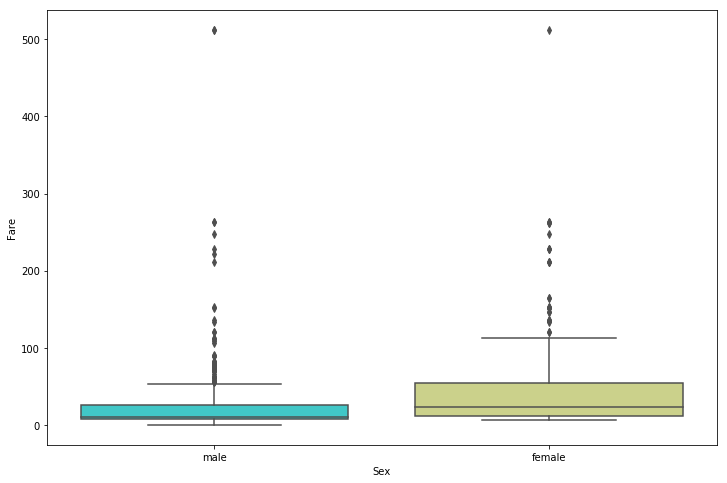

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Sex',y='Fare',data=df,palette='rainbow')

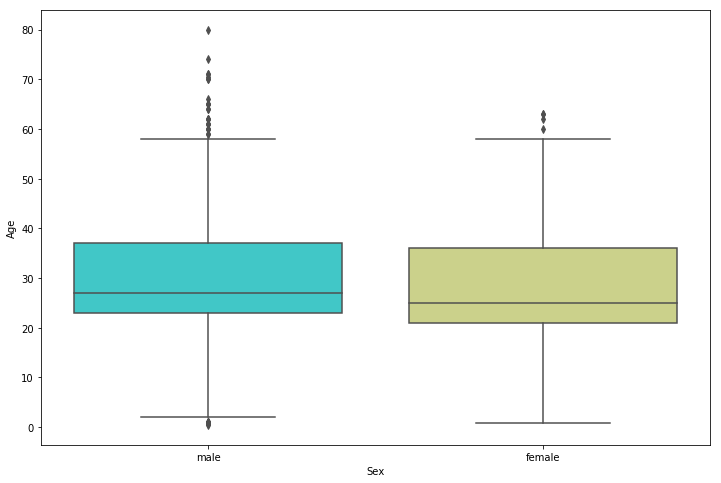

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Sex',y='Age',data=df,palette='rainbow')

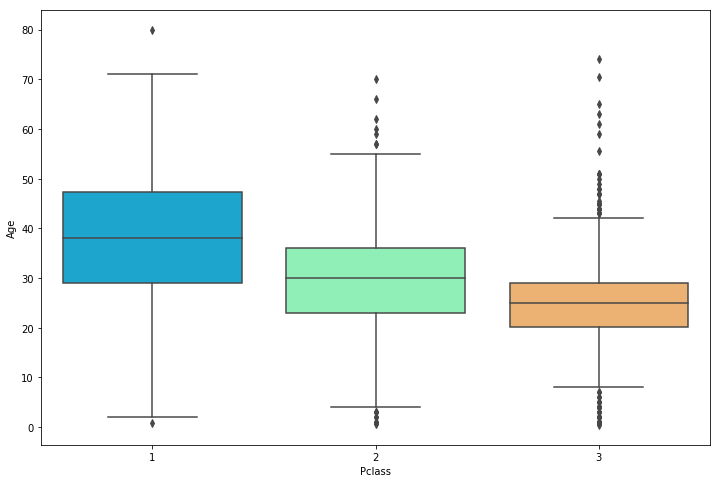

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

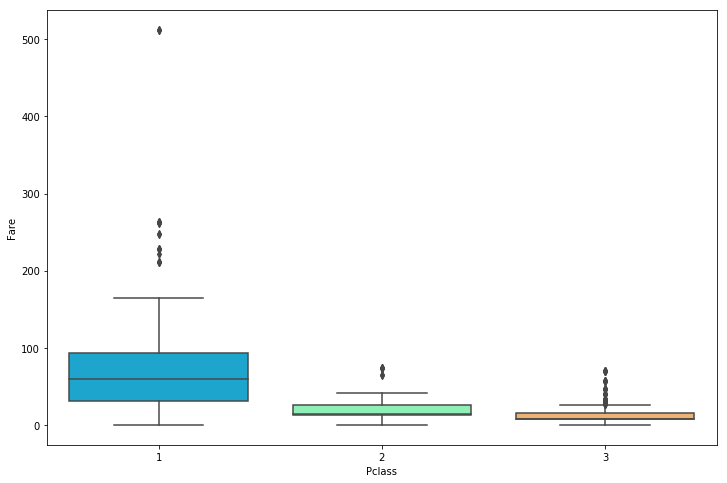

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Fare',data=df,palette='rainbow')

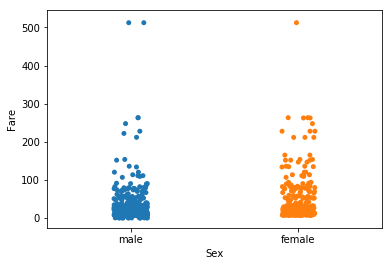

In [52]:
sns.stripplot(x='Sex',y='Fare',data=df)

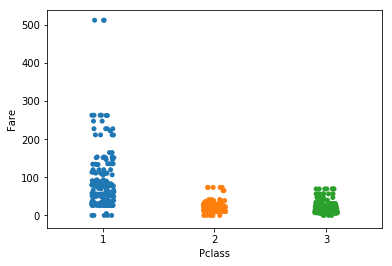

In [53]:
sns.stripplot(x='Pclass',y='Fare',data=df)

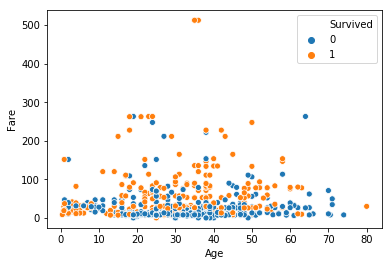

In [54]:
sns.scatterplot(df['Age'],df['Fare'],hue=df['Survived'])

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


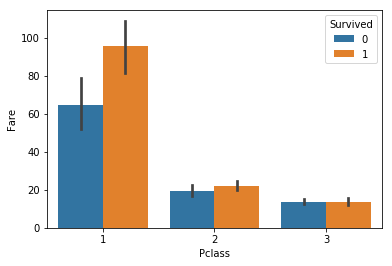

In [55]:
sns.barplot(x='Pclass',y='Fare',data=df,hue='Survived')

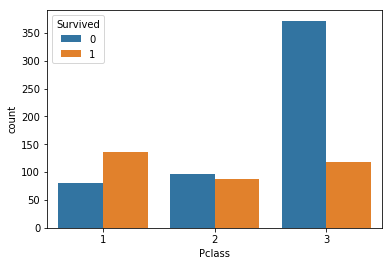

In [56]:
sns.countplot(x='Pclass',data=df,hue='Survived')

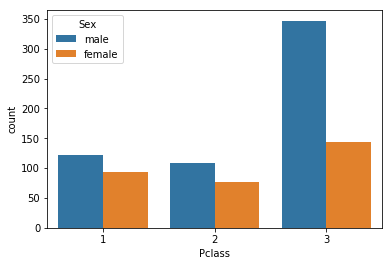

In [57]:
sns.countplot(x='Pclass',data=df,hue='Sex')

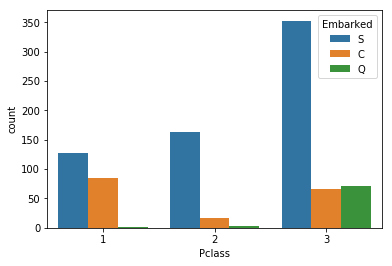

In [58]:
sns.countplot(x='Pclass',data=df,hue='Embarked')

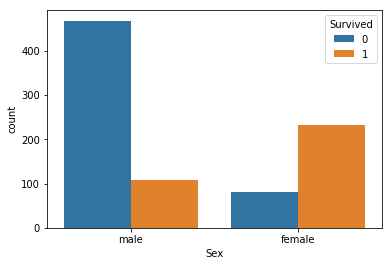

In [59]:
sns.countplot(x='Sex',data=df,hue='Survived')

c:\users\dell\py4e\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


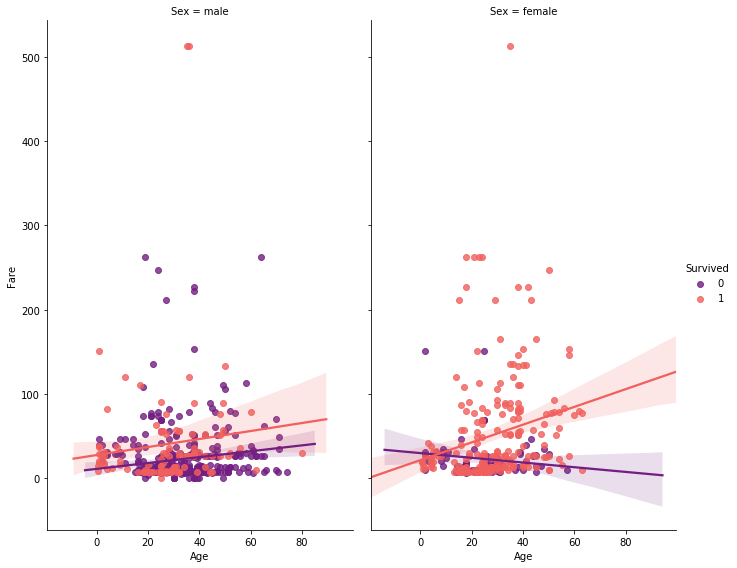

In [60]:
sns.lmplot(x='Age',y='Fare',data=df,col='Sex',hue='Survived',palette='magma',
          aspect=0.6,size=8)

**Multiple Plots on Data**

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


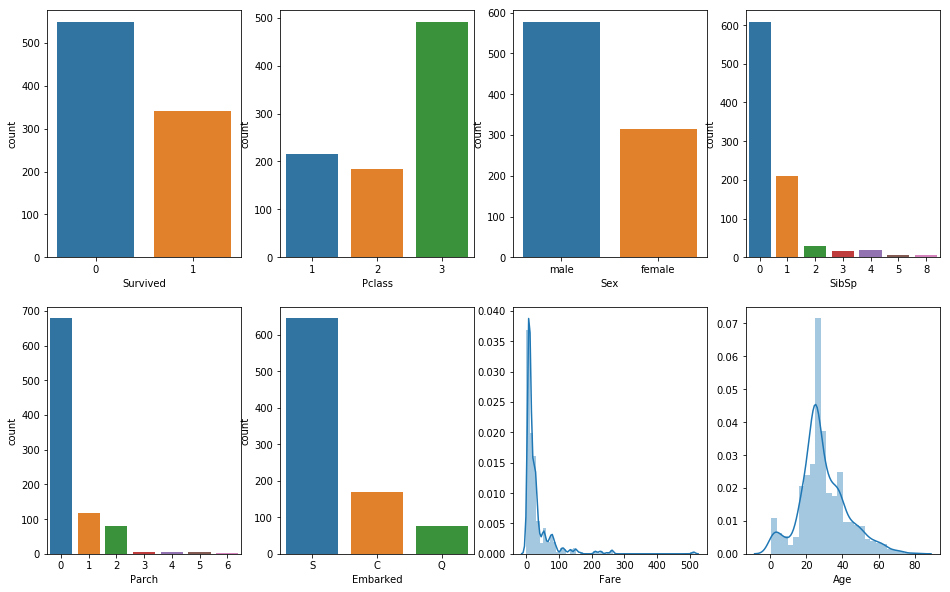

In [61]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.countplot('SibSp',data=df,ax=axes[0,3])
sns.countplot('Parch',data=df,ax=axes[1,0])
sns.countplot('Embarked',data=df,ax=axes[1,1])
sns.distplot(df['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df['Age'].dropna(),kde=True,ax=axes[1,3])

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


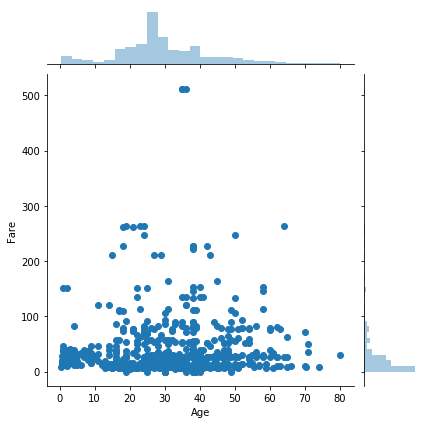

In [62]:
sns.jointplot(x="Age", y="Fare", data=df)

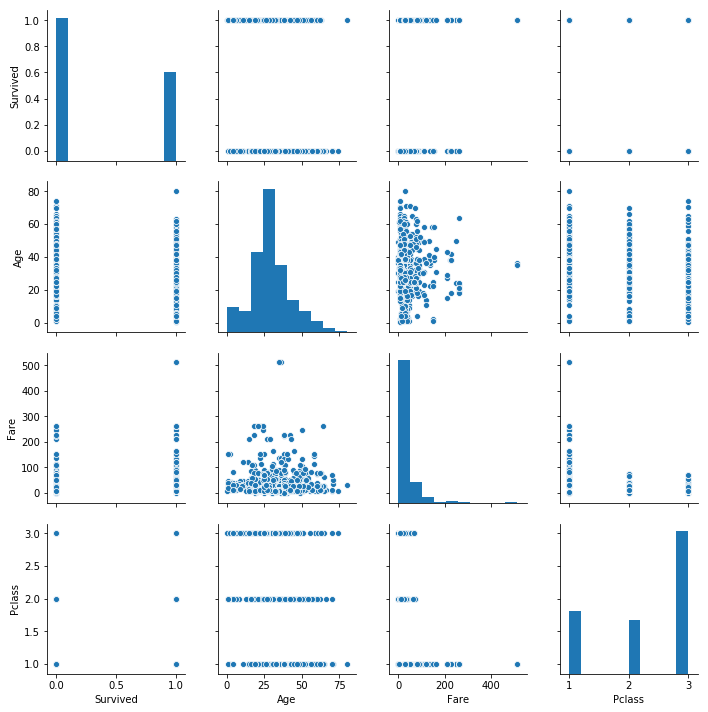

In [63]:
sns.pairplot(data=df[['Survived','Age','Fare','Pclass']])

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


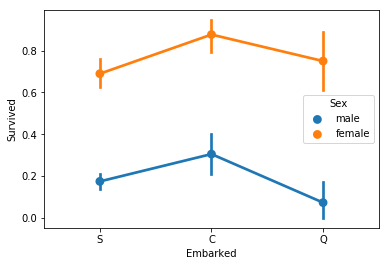

In [64]:
sns.pointplot(x='Embarked',y='Survived',data=df,hue='Sex')

c:\users\dell\py4e\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


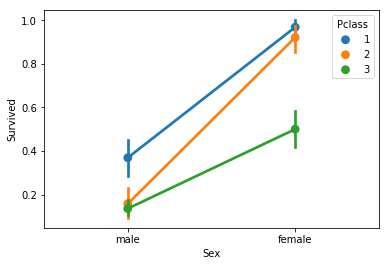

In [65]:
sns.pointplot(x='Sex',y='Survived',data=df,hue='Pclass')

In [66]:
# ValueError: Colormap  is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [67]:
# import warnings
# warnings.filterwarnings("ignore")

In [68]:
# df['Name'].apply(lambda x:x.split(", "))

**Calculating Missing Age Values in Raw Data**

In [72]:
df1 = pd.read_csv('titanic_train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Total Missing Age values in Raw Data** 

In [86]:
x = df1[df1['Age'].isnull()].count()[0]
x

0

In [82]:
(x/891)*100

19.865319865319865

In [83]:
df1.loc[df1['Age'].isnull()] = 2000

In [84]:
df1['Age']

0        22.0
1        38.0
2        26.0
3        35.0
4        35.0
5      2000.0
6        54.0
7         2.0
8        27.0
9        14.0
10        4.0
11       58.0
12       20.0
13       39.0
14       14.0
15       55.0
16        2.0
17     2000.0
18       31.0
19     2000.0
20       35.0
21       34.0
22       15.0
23       28.0
24        8.0
25       38.0
26     2000.0
27       19.0
28     2000.0
29     2000.0
        ...  
861      21.0
862      48.0
863    2000.0
864      24.0
865      42.0
866      27.0
867      31.0
868    2000.0
869       4.0
870      26.0
871      47.0
872      33.0
873      47.0
874      28.0
875      15.0
876      20.0
877      19.0
878    2000.0
879      56.0
880      25.0
881      33.0
882      22.0
883      28.0
884      25.0
885      39.0
886      27.0
887      19.0
888    2000.0
889      26.0
890      32.0
Name: Age, Length: 891, dtype: float64